# Music Popularity Analysis

<hr style="border:2px solid black"> </hr>

## Model Evaluation
## Notebook 01 - Predictive Power

---

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import KFold, GridSearchCV, train_test_split, cross_val_score, cross_validate
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, HistGradientBoostingRegressor, AdaBoostRegressor
from joblib import dump, load
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, SCORERS
import statsmodels.api as sm
import scipy as sp

In [2]:
def num_uniques(ser):
    try:
        return len(ser.unique())
    except:
        return "Not unique check-able"


def summarize_df(df):
    print("======DATA SUMMARY======")
    print("{} rows by {} columns".format(df.shape[0], df.shape[1]))
    print("\n======COLUMNS======")
    print(df.dtypes)
    print("\n======PREVIEW======")
    display(df.head())
    print("\n======NUMERICAL COL SUMMARY======")
    print(df.describe())
    print("\n")
    for col in df.columns:
        print("{}: {} unique values".format(col, num_uniques(df[col])))

---
### Import data

In [3]:
df = pd.read_csv('../03_EDA_Transformation/song_data_processed.csv', index_col=[0])
summarize_df(df)

======DATA SUMMARY======
26940 rows by 31 columns

======COLUMNS======
sp_danceability         float64
sp_energy               float64
sp_loudness             float64
sp_speechiness          float64
sp_acousticness         float64
sp_instrumentalness     float64
sp_liveness             float64
sp_valence              float64
sp_tempo                float64
sp_duration_ms            int64
sp_artist_popularity      int64
sp_artist_followers       int64
play_count                int64
sp_mode                   int64
sp_time_signature_0     float64
sp_time_signature_1     float64
sp_time_signature_3     float64
sp_time_signature_4     float64
sp_time_signature_5     float64
sp_key_0                float64
sp_key_1                float64
sp_key_2                float64
sp_key_3                float64
sp_key_4                float64
sp_key_5                float64
sp_key_6                float64
sp_key_7                float64
sp_key_8                float64
sp_key_9                float64
s

,sp_danceability,sp_energy,sp_loudness,sp_speechiness,sp_acousticness,sp_instrumentalness,sp_liveness,sp_valence,sp_tempo,sp_duration_ms,...,sp_key_2,sp_key_3,sp_key_4,sp_key_5,sp_key_6,sp_key_7,sp_key_8,sp_key_9,sp_key_10,sp_key_11
0,0.533,0.804,-7.516,0.0743,0.0211,0.00069,0.1270,0.277,145.023,256073,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.362,0.326,-15.748,0.0423,0.7390,0.79400,0.1040,0.191,179.880,164792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.760,0.557,-13.295,0.0625,0.0213,0.82200,0.0938,0.719,144.994,202893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.635,0.323,-12.979,0.0338,0.1420,0.53500,0.0974,0.209,179.996,156000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.664,0.440,-5.156,0.0360,0.0531,0.18100,0.0536,0.256,74.735,217600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



======NUMERICAL COL SUMMARY======
       sp_danceability     sp_energy   sp_loudness  sp_speechiness  \
count     26940.000000  26940.000000  26940.000000    26940.000000   
mean          0.529161      0.614964     -9.120079        0.087248   
std           0.185528      0.263511      5.439261        0.103623   
min           0.000000      0.000000    -60.000000        0.000000   
25%           0.403000      0.431000    -11.055250        0.035800   
50%           0.540000      0.655000     -7.679000        0.048000   
75%           0.666000      0.838000     -5.578000        0.085500   
max           0.977000      1.000000      4.106000        0.965000   

       sp_acousticness  sp_instrumentalness   sp_liveness    sp_valence  \
count     26940.000000         26940.000000  26940.000000  26940.000000   
mean          0.298166             0.239801      0.207013      0.419168   
std           0.337638             0.358885      0.184652      0.255309   
min           0.000000            

In [4]:
# Set random seed
r = 0

In [5]:
# Define data
X = np.array(df[[c for c in df.columns if c != 'play_count']])
y = np.array(df['play_count'])

In [6]:
# Make overall test_train split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=r)

---
### Linear Regression on all features

In [7]:
# Create the model
linreg = LinearRegression()

# Configure the outer-loop cross-validation
cv_outer = KFold(n_splits=10, shuffle=True, random_state = r)

# Execute the outer CV (no inner required for linear regression)
scores_linreg = cross_validate(linreg, X_trainval, y_trainval, cv=cv_outer,  scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'], n_jobs=-1, return_estimator=True)

In [8]:
for ind, estimator in enumerate(scores_linreg['estimator']):
    dump(estimator, r'initial_models_linreg/fold_{}.joblib'.format(ind))

In [9]:
score_df = pd.DataFrame(np.array(['linreg', scores_linreg['test_r2'], scores_linreg['test_neg_mean_absolute_error'], scores_linreg['test_neg_mean_squared_error']], dtype='object')[np.newaxis, :], columns=['model', 'r2', 'mae', 'mse'])

In [10]:
# train_score_df = pd.DataFrame(np.array(['linreg', scores_linreg['train_r2'], scores_linreg['train_neg_mean_absolute_error'], scores_linreg['train_neg_mean_squared_error']], dtype='object')[np.newaxis, :], columns=['model', 'r2', 'mae', 'mse'])

---
### LASSO

In [11]:
# Configure parameter tuning CV procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=r)

# Define the search space
params = dict()
params['alpha'] = np.linspace(0, 1000, 25)

# Create model object
lasso = Lasso(random_state=r)

# Create inner loop gridsearch object
lasso_cv = GridSearchCV(lasso, params, scoring='r2', cv = cv_inner, refit=True)

# Calculate outer cross validation
scores_lasso = cross_validate(lasso_cv, X_trainval, y_trainval, cv=cv_outer,  scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'], n_jobs=-1, return_estimator=True)

In [12]:
for ind, estimator in enumerate(scores_lasso['estimator']):
    dump(estimator, r'initial_models_lasso/fold_{}.joblib'.format(ind))

In [13]:
score_df = pd.concat([score_df, pd.DataFrame(np.array(['lasso', scores_lasso['test_r2'], scores_lasso['test_neg_mean_absolute_error'], scores_lasso['test_neg_mean_squared_error']], dtype='object')[np.newaxis, :], columns=['model', 'r2', 'mae', 'mse'])])

In [70]:
for ind, estimator in enumerate(scores_lasso['estimator']):
    print("{} of {} possible".format(sum(estimator.best_estimator_.coef_ != 0), len(estimator.best_estimator_.coef_)))

20 of 30 possible
20 of 30 possible
26 of 30 possible
20 of 30 possible
20 of 30 possible
22 of 30 possible
19 of 30 possible
19 of 30 possible
23 of 30 possible
19 of 30 possible


In [14]:
# train_score_df = pd.concat([train_score_df, pd.DataFrame(np.array(['lasso', scores_lasso['train_r2'], scores_lasso['train_neg_mean_absolute_error'], scores_lasso['train_neg_mean_squared_error']], dtype='object')[np.newaxis, :], columns=['model', 'r2', 'mae', 'mse'])])

In [15]:
# Configure parameter tuning CV procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=r)

# Define the search space
params = dict()
params['alpha'] = np.linspace(0, 1000, 25)

# Create model object
ridge = Ridge(random_state=r, alpha=1)

# Create inner loop gridsearch object
ridge_cv = GridSearchCV(ridge, params, scoring='r2', cv = cv_inner, refit=True)

# Calculate outer cross validation
scores_ridge = cross_validate(ridge_cv, X_trainval, y_trainval, cv=cv_outer,  scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'], n_jobs=-1,
                              return_estimator=True)

In [16]:
for ind, estimator in enumerate(scores_ridge['estimator']):
    dump(estimator, r'initial_models_ridge/fold_{}.joblib'.format(ind))

In [17]:
score_df = pd.concat([score_df, pd.DataFrame(np.array(['ridge', scores_ridge['test_r2'], scores_ridge['test_neg_mean_absolute_error'], scores_ridge['test_neg_mean_squared_error']], dtype='object')[np.newaxis, :], columns=['model', 'r2', 'mae', 'mse'])])

In [18]:
# train_score_df = pd.concat([train_score_df, pd.DataFrame(np.array(['ridge', scores_ridge['train_r2'], scores_ridge['train_neg_mean_absolute_error'], scores_ridge['train_neg_mean_squared_error']], dtype='object')[np.newaxis, :], columns=['model', 'r2', 'mae', 'mse'])])

---
### Random Forest

In [19]:
# Configure parameter tuning CV procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=r)

# Define the search space
params = dict()
params['n_estimators'] = [150, 250, 500]
params['max_depth'] = [4, 8, 12]
params['max_features'] = ['auto', 'sqrt']


# Create model object
rf = RandomForestRegressor(random_state=r)

# Create inner loop gridsearch object
rf_cv = GridSearchCV(rf, params, scoring='r2', cv=cv_inner, refit=True)

# Calculate outer cross validation
scores_rf = cross_validate(rf_cv, X_trainval, y_trainval, cv=cv_outer,  scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'], n_jobs=-1,
                           return_estimator=True)

In [20]:
for ind, estimator in enumerate(scores_rf['estimator']):
        dump(estimator, r'initial_models_rf/fold_{}.joblib'.format(ind))

In [21]:
score_df = pd.concat([score_df, pd.DataFrame(np.array(['rf', scores_rf['test_r2'], scores_rf['test_neg_mean_absolute_error'], scores_rf['test_neg_mean_squared_error']], dtype='object')[np.newaxis, :], columns=['model', 'r2', 'mae', 'mse'])])

In [22]:
# train_score_df = pd.concat([train_score_df, pd.DataFrame(np.array(['rf', scores_rf['train_r2'], scores_rf['train_neg_mean_absolute_error'], scores_rf['train_neg_mean_squared_error']], dtype='object')[np.newaxis, :], columns=['model', 'r2', 'mae', 'mse'])])

---
### Gradient Boost

In [23]:
# Configure parameter tuning CV procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=r)

# Define the search space
params = dict()
params['n_estimators'] = [150, 250, 500]
params['max_depth'] = [4, 8, 20]
params['learning_rate'] = [0.01, 0.04, 1]
params['subsample'] = [1, 0.9, 0.5]
params['max_features'] = ['auto', 'sqrt']


# Create model object
gb = GradientBoostingRegressor(random_state=r)

# Create inner loop gridsearch object
gb_cv = GridSearchCV(gb, params, scoring='r2', cv=cv_inner, refit=True)

# Calculate outer cross validation
scores_gb = cross_validate(gb_cv, X_trainval, y_trainval, cv=cv_outer,  scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'], n_jobs=-1,
                           return_estimator=True)

In [24]:
for ind, estimator in enumerate(scores_gb['estimator']):
    dump(estimator, r'initial_models_gb/fold_{}.joblib'.format(ind))

In [25]:
score_df = pd.concat([score_df, pd.DataFrame(np.array(['gb', scores_gb['test_r2'], scores_gb['test_neg_mean_absolute_error'], scores_gb['test_neg_mean_squared_error']], dtype='object')[np.newaxis, :], columns=['model', 'r2', 'mae', 'mse'])])

In [26]:
# train_score_df = pd.concat([train_score_df, pd.DataFrame(np.array(['gb', scores_gb['train_r2'], scores_gb['train_neg_mean_absolute_error'], scores_gb['train_neg_mean_squared_error']], dtype='object')[np.newaxis, :], columns=['model', 'r2', 'mae', 'mse'])])

---
### HistGradientBoosting

In [27]:
# Configure parameter tuning CV procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=r)

# Define the search space
params = dict()
params['max_iter'] = [50, 150, 250, 500]
params['max_depth'] = [4, 8, 12, 20, 50]
params['learning_rate'] = [0.01, 0.04]

# Create model object
hgb = HistGradientBoostingRegressor(random_state=r)

# Create inner loop gridsearch object
hgb_cv = GridSearchCV(hgb, params, scoring='r2', cv=cv_inner, refit=True)

# Calculate outer cross validation
scores_hgb = cross_validate(hgb_cv, X_trainval, y_trainval, cv=cv_outer,  scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'], n_jobs=-1,
                           return_estimator=True)

In [28]:
for ind, estimator in enumerate(scores_hgb['estimator']):
    dump(estimator, r'initial_models_hgb/fold_{}.joblib'.format(ind))

In [29]:
score_df = pd.concat([score_df, pd.DataFrame(np.array(['hgb', scores_hgb['test_r2'], scores_hgb['test_neg_mean_absolute_error'], scores_hgb['test_neg_mean_squared_error']], dtype='object')[np.newaxis, :], columns=['model', 'r2', 'mae', 'mse'])])

In [30]:
# train_score_df = pd.concat([train_score_df, pd.DataFrame(np.array(['hgb', scores_hgb['train_r2'], scores_hgb['train_neg_mean_absolute_error'], scores_hgb['train_neg_mean_squared_error']], dtype='object')[np.newaxis, :], columns=['model', 'r2', 'mae', 'mse'])])

In [31]:
display(score_df)

,model,r2,mae,mse
0,linreg,"[0.17944450199287998, 0.18088991123049447, 0.1...","[-276742.1212815333, -266938.6050038572, -2859...","[-648820198954.5662, -585840729124.5652, -8799..."
0,lasso,"[0.180344798890122, 0.18177395128029483, 0.184...","[-273248.1264245307, -264044.98869473935, -284...","[-648108326554.2162, -585208449441.4662, -8799..."
0,ridge,"[0.17954734494987, 0.1812888326356188, 0.18459...","[-275418.1229415283, -265396.56335397385, -285...","[-648738880155.3169, -585555414110.0809, -8799..."
0,rf,"[0.3291960817190003, 0.305516959062925, 0.2969...","[-228359.60024776903, -217090.24567976597, -23...","[-530410353444.2521, -496705457111.8939, -7586..."
0,gb,"[0.3822520949666254, 0.3491474083728734, 0.412...","[-213669.4598850843, -208805.88534683923, -212...","[-488458513313.1882, -465500256997.49854, -634..."
0,hgb,"[0.3108782699295468, 0.3181858296765323, 0.329...","[-232140.11868299285, -220335.84560863613, -22...","[-544894402748.05963, -487644476787.97925, -72..."


In [32]:
score_df.to_csv('initial_model_scores.csv')

---
---
## Model Comparison

In [33]:
score_df['r2_avg'] = score_df['r2'].apply(lambda x: np.mean(x))
score_df['mae_avg'] = score_df['mae'].apply(lambda x: np.mean(x))
score_df['mse_avg'] = score_df['mse'].apply(lambda x: np.mean(x))
display(score_df)

,model,r2,mae,mse,r2_avg,mae_avg,mse_avg
0,linreg,"[0.17944450199287998, 0.18088991123049447, 0.1...","[-276742.1212815333, -266938.6050038572, -2859...","[-648820198954.5662, -585840729124.5652, -8799...",0.181639,-273220.313861,-6.669924e+11
0,lasso,"[0.180344798890122, 0.18177395128029483, 0.184...","[-273248.1264245307, -264044.98869473935, -284...","[-648108326554.2162, -585208449441.4662, -8799...",0.181840,-270388.317850,-6.668300e+11
0,ridge,"[0.17954734494987, 0.1812888326356188, 0.18459...","[-275418.1229415283, -265396.56335397385, -285...","[-648738880155.3169, -585555414110.0809, -8799...",0.181660,-272271.910109,-6.669790e+11
0,rf,"[0.3291960817190003, 0.305516959062925, 0.2969...","[-228359.60024776903, -217090.24567976597, -23...","[-530410353444.2521, -496705457111.8939, -7586...",0.302265,-225363.248190,-5.682784e+11
0,gb,"[0.3822520949666254, 0.3491474083728734, 0.412...","[-213669.4598850843, -208805.88534683923, -212...","[-488458513313.1882, -465500256997.49854, -634...",0.353685,-213748.521269,-5.216667e+11
0,hgb,"[0.3108782699295468, 0.3181858296765323, 0.329...","[-232140.11868299285, -220335.84560863613, -22...","[-544894402748.05963, -487644476787.97925, -72...",0.312945,-222857.698789,-5.573477e+11


---
---
## Selected Model Analysis

### Hyperparameter Selection and Additional Tuning

In [34]:
for ind, estimator in enumerate(scores_gb['estimator']):
    print('\nESTIMATOR {}'.format(ind))
    print(estimator.best_params_)


ESTIMATOR 0
{'learning_rate': 0.04, 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500, 'subsample': 0.9}

ESTIMATOR 1
{'learning_rate': 0.01, 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 500, 'subsample': 0.9}

ESTIMATOR 2
{'learning_rate': 0.04, 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 250, 'subsample': 0.9}

ESTIMATOR 3
{'learning_rate': 0.04, 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 250, 'subsample': 0.9}

ESTIMATOR 4
{'learning_rate': 0.04, 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500, 'subsample': 0.9}

ESTIMATOR 5
{'learning_rate': 0.04, 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500, 'subsample': 0.9}

ESTIMATOR 6
{'learning_rate': 0.04, 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500, 'subsample': 0.9}

ESTIMATOR 7
{'learning_rate': 0.04, 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500, 'subsample': 0.9}

ESTIMATOR 8
{'learning_rate': 0.04, 'max_depth': 4, 'max_features': 'a

In [35]:
# Configure parameter tuning CV procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=r)

# Define the search space
params = dict()
params['max_depth'] = [4, 20]
params['learning_rate'] = [0.04, 0.1, 1]

# Create model object
gb2 = GradientBoostingRegressor(random_state=r, n_estimators=500, subsample=0.9, max_features='auto')

# Create inner loop gridsearch object
gb2_cv = GridSearchCV(gb2, params, scoring='r2', cv=cv_inner, refit=True)

# Calculate outer cross validation
scores_gb2 = cross_validate(gb2_cv, X_trainval, y_trainval, cv=cv_outer,  scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'], n_jobs=-1,
                           return_estimator=True, return_train_score=True)

In [36]:
for ind, estimator in enumerate(scores_gb2['estimator']):
    print('\nESTIMATOR {}'.format(ind))
    print(estimator.best_params_)


ESTIMATOR 0
{'learning_rate': 0.04, 'max_depth': 4}

ESTIMATOR 1
{'learning_rate': 0.04, 'max_depth': 4}

ESTIMATOR 2
{'learning_rate': 0.04, 'max_depth': 4}

ESTIMATOR 3
{'learning_rate': 0.04, 'max_depth': 4}

ESTIMATOR 4
{'learning_rate': 0.04, 'max_depth': 4}

ESTIMATOR 5
{'learning_rate': 0.04, 'max_depth': 4}

ESTIMATOR 6
{'learning_rate': 0.04, 'max_depth': 4}

ESTIMATOR 7
{'learning_rate': 0.04, 'max_depth': 4}

ESTIMATOR 8
{'learning_rate': 0.04, 'max_depth': 4}

ESTIMATOR 9
{'learning_rate': 0.04, 'max_depth': 4}


In [37]:
print("R2: {}".format(np.mean(scores_gb2['test_r2'])))
print("MAE: {}".format(np.mean(scores_gb2['test_neg_mean_absolute_error'])))
print("MSE: {}".format(np.mean(scores_gb2['test_neg_mean_squared_error'])))

R2: 0.3572825718501538
MAE: -212790.34197515357
MSE: -518057486509.66876


---
### Train 'final' boosting model

In [38]:
# Create model object
gb_final = GradientBoostingRegressor(random_state=r, n_estimators=500, subsample=0.9, max_features='auto', max_depth=4, learning_rate=0.04)

# Fit model object
gb_final.fit(X_trainval, y_trainval)

GradientBoostingRegressor(learning_rate=0.04, max_depth=4, max_features='auto',
                          n_estimators=500, random_state=0, subsample=0.9)

In [39]:
dump(gb_final, r'final_models/gradient_boosting_regression.joblib')

['final_models/gradient_boosting_regression.joblib']

---
### Performance - test score

In [40]:
y_test_preds = gb_final.predict(X_test)
print("R2: {}".format(r2_score(y_test, y_test_preds)))
print("MAE: {}".format(mean_absolute_error(y_test, y_test_preds)))
print("MSE: {}".format(mean_squared_error(y_test, y_test_preds)))

R2: 0.33890677443809913
MAE: 222511.70705941203
MSE: 620127652473.614


---
### Feature importances

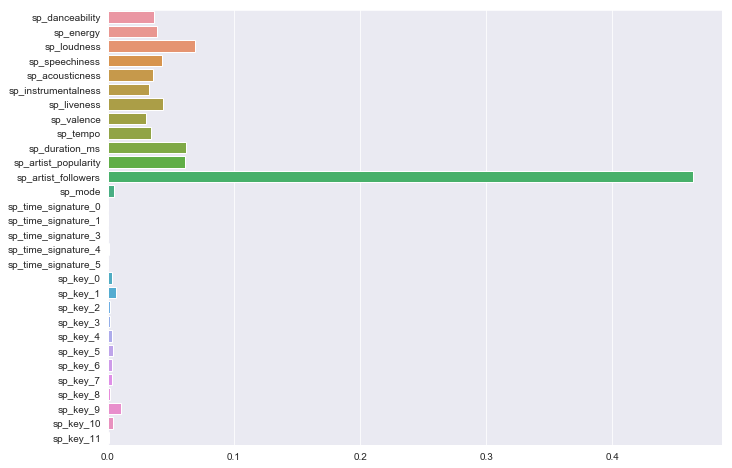

In [41]:
feature_imps = gb_final.feature_importances_
plt.figure(figsize=(11, 8))
sns.barplot(y=[c for c in df.columns if c != 'play_count'], x=feature_imps)
plt.show()

---
### Look at Lasso more closely for feature insights

In [42]:
# Lasso prep
for ind, estimator in enumerate(scores_lasso['estimator']):
    print('\nESTIMATOR {}'.format(ind))
    print(estimator.best_params_)


ESTIMATOR 0
{'alpha': 875.0}

ESTIMATOR 1
{'alpha': 625.0}

ESTIMATOR 2
{'alpha': 375.0}

ESTIMATOR 3
{'alpha': 833.3333333333333}

ESTIMATOR 4
{'alpha': 791.6666666666666}

ESTIMATOR 5
{'alpha': 583.3333333333333}

ESTIMATOR 6
{'alpha': 1000.0}

ESTIMATOR 7
{'alpha': 1000.0}

ESTIMATOR 8
{'alpha': 458.3333333333333}

ESTIMATOR 9
{'alpha': 666.6666666666666}


In [43]:
# Configure parameter tuning CV procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=r)

# Define the search space
params = dict()
params['alpha'] = np.linspace(0, 1000, 25)

# Create model object
lasso_final = Lasso(random_state=r)

# Create inner loop gridsearch object
lasso_final_cv = GridSearchCV(lasso_final, params, scoring='r2', cv = cv_inner, refit=True)

# Fit model object
lasso_final_cv.fit(X_trainval, y_trainval)

# Pull out best model
lasso_final_model = lasso_final_cv.best_estimator_

/Users/andrewtaylor/opt/anaconda3/envs/isye6740-project/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/andrewtaylor/opt/anaconda3/envs/isye6740-project/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/andrewtaylor/opt/anaconda3/envs/isye6740-project/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4752202401881345.0, tolerance: 1170630697408.1436
  positive)
/Users/andrewtaylor/opt/anaconda3/envs/isye6740-project/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: Wit

In [44]:
dump(lasso_final_model, r'final_models/lasso.joblib')

['final_models/lasso.joblib']

In [45]:
y_test_preds_l = lasso_final_model.predict(X_test)
print("R2: {}".format(r2_score(y_test, y_test_preds_l)))
print("MAE: {}".format(mean_absolute_error(y_test, y_test_preds_l)))
print("MSE: {}".format(mean_squared_error(y_test, y_test_preds_l)))

R2: 0.20304438228537447
MAE: 276008.6754066017
MSE: 747571140089.915


In [46]:
print(lasso_final_cv.best_params_)

{'alpha': 708.3333333333333}


In [63]:
print(lasso_final_model.coef_)

[-9.28860807e+04  3.49306660e+04 -2.14402533e+03 -3.22595144e+05
 -8.82974354e+04 -3.95151956e+04  1.28523454e+05 -0.00000000e+00
  7.51881524e+01  1.35043041e-01  4.40890079e+03  4.30448220e-02
 -1.08649552e+04 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  1.38698675e+04 -4.63162809e+02  1.35349713e+04 -5.23113873e+04
 -0.00000000e+00 -0.00000000e+00  1.92091419e+04 -3.34461441e+04
  0.00000000e+00  0.00000000e+00 -2.97544781e+04  2.11656053e+04
 -0.00000000e+00  0.00000000e+00]


In [76]:
X_trainval_c = sm.add_constant(X_trainval)
est = sm.OLS(y_trainval, X_trainval_c).fit_regularized(alpha=lasso_final_cv.best_params_['alpha'], L1_wt=1, refit=True)
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     212.6
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        09:23:09   Log-Likelihood:            -3.2393e+05
No. Observations:               21552   AIC:                         6.479e+05
Df Residuals:                   21529   BIC:                         6.481e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.876e+05   1.89e+05     -0.995      0.3

In [89]:
lasso_p_values = pd.DataFrame((zip(['const']+[c for c in df.columns if c != 'play_count'], est.pvalues)), columns=['feature', 'p-value'])
def significance(x):
    if x < 0.01:
        return 'significant'
    elif x < 0.05:
        return 'slightly significant'
    elif np.isnan(x):
        return 'not used'
    else:
        return 'not significant'
lasso_p_values['significance'] = lasso_p_values['p-value'].apply(lambda x: significance(x))
lasso_p_values['coefficient'] = est.params

In [90]:
display(lasso_p_values)

,feature,p-value,significance,coefficient
0,const,3.198262e-01,not significant,-187557.931548
1,sp_danceability,1.163260e-03,significant,-112273.524190
2,sp_energy,1.339123e-01,not significant,65640.907101
3,sp_loudness,5.001775e-02,not significant,-3755.092950
4,sp_speechiness,3.500852e-12,significant,-392858.537131
5,sp_acousticness,4.336460e-04,significant,-91932.690046
6,sp_instrumentalness,3.752583e-03,significant,-54227.832848
7,sp_liveness,6.465079e-06,significant,144098.109014
8,sp_valence,NaN,not used,0.000000
9,sp_tempo,8.062563e-01,not significant,46.966164


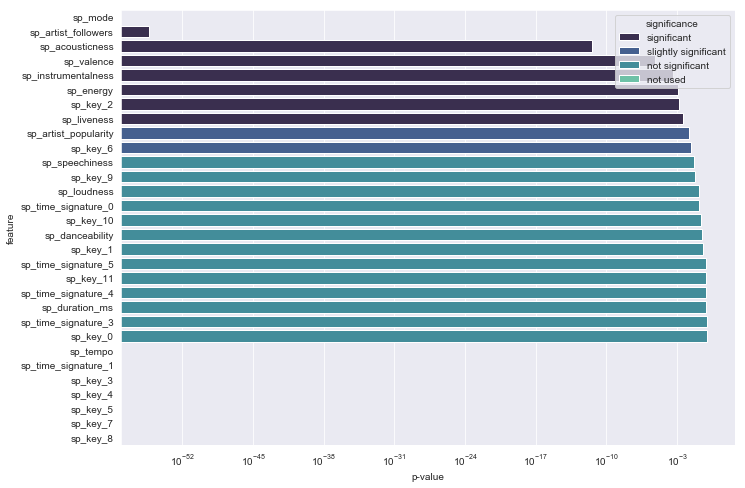

In [49]:
plt.figure(figsize=(11, 8))
pal = sns.color_palette("mako", 4)
g = sns.barplot(data=lasso_p_values.sort_values('p-value'), x='p-value', y='feature', hue='significance', dodge=False, palette=pal)
g.set_xscale("log")
plt.show()

---
# FIN

In [105]:
y_trainval_log = np.log(y_trainval)
y_trainval_log[y_trainval_log < 0] = 0

/Users/andrewtaylor/opt/anaconda3/envs/isye6740-project/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [108]:
# Configure parameter tuning CV procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=r)

# Define the search space
params = dict()
params['alpha'] = np.linspace(0, 10, 50)

# Create model object
lasso_log_final = Lasso(random_state=r)

# Create inner loop gridsearch object
lasso_log_final_cv = GridSearchCV(lasso_log_final, params, scoring='r2', cv = cv_inner, refit=True)

# Fit model object
lasso_log_final_cv.fit(X_trainval, y_trainval_log)

# Pull out best model
lasso_log_final_model = lasso_log_final_cv.best_estimator_

/Users/andrewtaylor/opt/anaconda3/envs/isye6740-project/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/andrewtaylor/opt/anaconda3/envs/isye6740-project/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/andrewtaylor/opt/anaconda3/envs/isye6740-project/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66079.39045657797, tolerance: 19.235843088768547
  positive)
/Users/andrewtaylor/opt/anaconda3/envs/isye6740-project/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With

In [110]:
X_trainval_c = sm.add_constant(X_trainval)
est = sm.OLS(y_trainval_log, X_trainval_c).fit_regularized(alpha=lasso_log_final_cv.best_params_['alpha'], L1_wt=1, refit=True)
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     313.0
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:44:25   Log-Likelihood:                -54479.
No. Observations:               21552   AIC:                         1.090e+05
Df Residuals:                   21521   BIC:                         1.093e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2600      0.194     21.971      0.0

In [75]:
# pred_val = est.fittedvalues.copy()
# true_val = y_trainval.copy()
# residual = true_val - pred_val
#
# fig, ax = plt.subplots(figsize=(6, 2.5))
# _ = ax.scatter(residual, true_val)

In [74]:
# fig, ax = plt.subplots(figsize=(6, 2.5))
# _, (__, ___, rval) = sp.stats.probplot(residual, plot=ax, fit=True)
# rval**2

---
### Re-train Lasso with log transformations of dependent and/or independent variables for feature insights

In [52]:
# poly = PolynomialFeatures(2)
# X_trainval_poly2 = poly.fit_transform(X_trainval)
# X_test_poly2 = poly.transform(X_test)

In [53]:
# # Configure parameter tuning CV procedure
# cv_inner = KFold(n_splits=3, shuffle=True, random_state=r)
#
# # Define the search space
# params = dict()
# params['alpha'] = np.linspace(0.01, 1000, 25)
#
# # Create model object
# lasso_final_poly = Lasso(random_state=r, max_iter=10000)
#
# # Create inner loop gridsearch object
# lasso_final_poly_cv = GridSearchCV(lasso_final_poly, params, scoring='r2', cv = cv_inner, refit=True)
#
# # Fit model object
# lasso_final_poly_cv.fit(X_trainval_poly2, y_trainval)
#
# # Pull out best model
# lasso_final_poly_model = lasso_final_poly_cv.best_estimator_

In [54]:
# # Evaluate parameter changes
# print(lasso_final_poly_cv.best_params_)

In [55]:
# y_test_preds_l_poly = lasso_final_poly_model.predict(X_test_poly2)
# print("R2: {}".format(r2_score(y_test, y_test_preds_l_poly)))
# print("MAE: {}".format(mean_absolute_error(y_test, y_test_preds_l_poly)))
# print("MSE: {}".format(mean_squared_error(y_test, y_test_preds_l_poly)))

In [56]:
# X_trainval_poly2_c = sm.add_constant(X_trainval_poly2)
# est_poly = sm.OLS(y_trainval, X_trainval_poly2_c).fit_regularized(alpha=y_test_preds_l_poly.best_params_['alpha'], L1_wt=1, refit=True)
# print(est_poly.summary())

In [57]:
# pred_val_p = est_poly.fittedvalues.copy()
# true_val = y_trainval.copy()
# residual_p = true_val - pred_val_p
#
# fig, ax = plt.subplots(figsize=(6, 2.5))
# _ = ax.scatter(residual_p, true_val)

In [58]:
# fig, ax = plt.subplots(figsize=(6, 2.5))
# _, (__, ___, rscore) = sp.stats.probplot(residual_p, plot=ax, fit=True)
# rscore**2